# Introduction 

by Karna Basu and Jonathan Conning

There are several ipython notebooks in this folder all aimed at documenting and providing the code to generate simulations and figures for our paper. You'll also find the most recent latex file of the paper. 

The main notebooks are:

   - [Competitive contracts](Competitive_contracts.ipynb)
   - [Monopoly contracts](monopoly_contracts.ipynb)
   - [figures_imperfect_commitment](figures_imperfect_commitment.ipynb)
   - [other_things](other_things.ipynb)
   
Each in turn work with the library [Contract.py](Contract.py)

These notebooks have been edited to varying degrees of coherence. In a few cases the notebooks started out being for one documentation purpose but then became the vehicle for drawing particular figures or doing specific simulations.  For this reason the story told by the text and the math do not always align perfectly with what is being coded or plotted.

What remains of this notebook is just space for a few explorations of the shape of CRRA utility functions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['axes.formatter.useoffset'] = 'False'
np.set_printoptions(precision=2)    # array printing format 

## Notes on CRRA

If the utility function is

$$ u(c) = {c^{1-\rho} \over {(1-\rho)}} $$
then the parameter $\rho$ measures the degree of relative risk aversion. 

When working with discounted utility as the weighted sum of CRRA functions, as in our model, the optimal ratio of consumption across periods will depend only on relative prices, not on the present value of income (all income elasticities are equal to one).  In the case of exponential discounters the intertemporal elasticity of substitution (the elasticity of the ratio of the consumed quantities of the two goods with respect to the marginal rate of substitution [or price ratio]) will be given by $\sigma  =  {1 \over \rho}$.  

Period 0 consumer's Euler equation implies

$$\frac{c_1}{c_0} = \beta^\frac{1}{\rho}$$

Or if we had non-zero interest rates 

$$\frac{c_1}{c_0} = (\beta \cdot (1+r))^\frac{1}{\rho}$$
So the strength of the substitution effect to a change in relative prices (or $\beta$) is given by $\sigma$. Income plays no role so the ratio of consumptions is the same at any income level (homothetic indifference curves; all income elasticities are one).

In choosing parameters for the model it will be useful to understand how $\beta^\frac{1}{\rho}$ changes with $\rho$ 

In [2]:
rh = np.arange(0.5,1.7,0.2)
rh

array([ 0.5,  0.7,  0.9,  1.1,  1.3,  1.5])

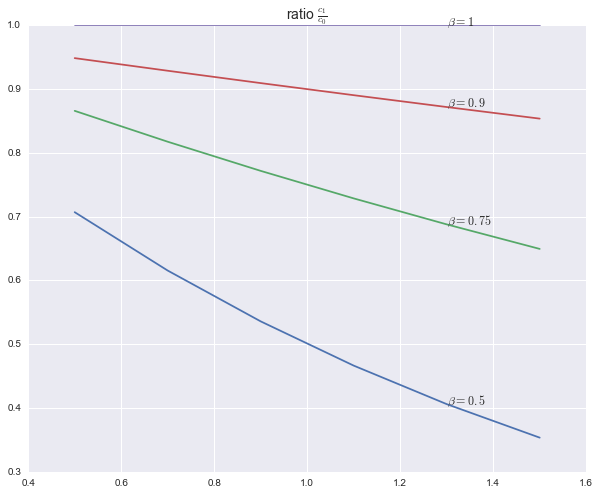

In [3]:
for bt in [0.5, 0.75, 0.9, 1]:
    plt.plot(rh, bt**rh)
    plt.text(1.3, bt**1.3, r'$\beta ={}$'.format(bt))
plt.title(r'ratio $\frac{c_1}{c_0}$',fontsize=14)
plt.show()

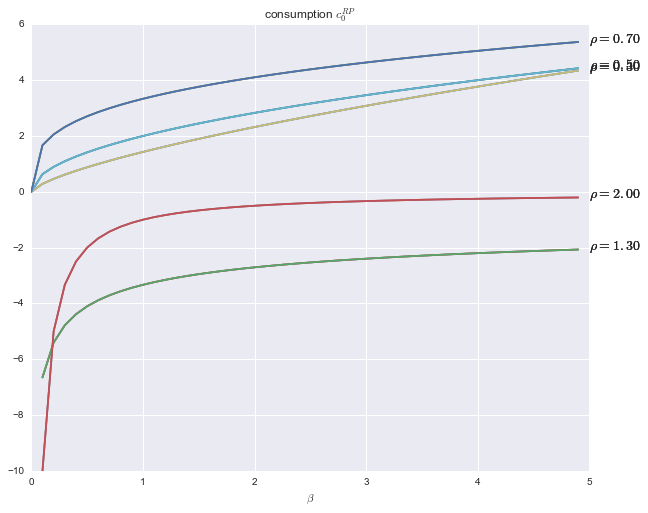

In [4]:
c = np.arange(0,5,0.1)
for bt in [0.5,0.75, 0.95]:
    for rh in [0.3, 0.5, 0.7, 1.3, 2]:
        u =  (1/(1-rh)) * c**(1-rh)
        plt.plot(c, u)
        plt.text(5, u[-1], r'$\rho = {:3.2f}$'.format(rh), fontsize=14)
    #plt.annotate('{:3.1f}'.format(rh),xy=(50,u(50)))
plt.title(r'consumption $c_0^{RP}$')
plt.xlabel(r'$\beta$')
plt.show()

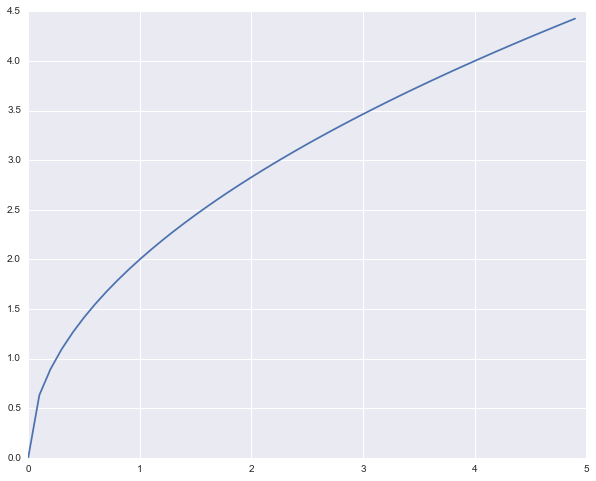

In [5]:
rh = 1/2
u = (c**(1-rh))/(1-rh)
plt.plot(c,u)